# Data Wrangling Using Pandas: Summarize Data

# Introduction

Goal: Explore the data to gain insights and tidy our data, preparing it for machine learning algorithms. To accomplish these goals, we 
will use Pandas.  

Pandas is a library for data manipulation, munging and analysis of tabular and time series data. It contains extensive tools designed to make data analysis fast and easy.  https://pandas.pydata.org/pandas-docs/stable/dsintro.html

Let's get ready to wrangle ... 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno # explore missing data
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer

## Understand the Problem

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans). Let's look at the schema in home_creadit.png. 

## Summarize Data

In [4]:
# Load data sets <Shift-Tab> see inside function parenthesis to see more arguments.
df = pd.read_csv('/Users/stewarta/Documents/DATA/Home Data/bureau.csv')

## A first look at the data ...

In [5]:
df.head(6)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN


## Size, footprint, and missing values
1) How many rows and columns do we have? 
2) What dtypes have been inferred? 
3) How much data is missing in each columnd? 
4) How much memory is used?

In [6]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                1716428 non-null int64
SK_ID_BUREAU              1716428 non-null int64
CREDIT_ACTIVE             1716428 non-null object
CREDIT_CURRENCY           1716428 non-null object
DAYS_CREDIT               1716428 non-null int64
CREDIT_DAY_OVERDUE        1716428 non-null int64
DAYS_CREDIT_ENDDATE       1610875 non-null float64
DAYS_ENDDATE_FACT         1082775 non-null float64
AMT_CREDIT_MAX_OVERDUE    591940 non-null float64
CNT_CREDIT_PROLONG        1716428 non-null int64
AMT_CREDIT_SUM            1716415 non-null float64
AMT_CREDIT_SUM_DEBT       1458759 non-null float64
AMT_CREDIT_SUM_LIMIT      1124648 non-null float64
AMT_CREDIT_SUM_OVERDUE    1716428 non-null float64
CREDIT_TYPE               1716428 non-null object
DAYS_CREDIT_UPDATE        1716428 non-null int64
AMT_ANNUITY               489637 non-null float64
dtypes: float64(8), int64(6), object(

## Check data types 

In [42]:
df.astype(dtype={'SK_ID_CURR': 'object', 'SK_ID_BUREAU': 'object'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                object
SK_ID_BUREAU              object
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(4), object(5)
memory usage: 222.6+ MB


## Descriptive Statistics

In [7]:
df.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


## Histogram
What is the shape of the data? What's doing on here?

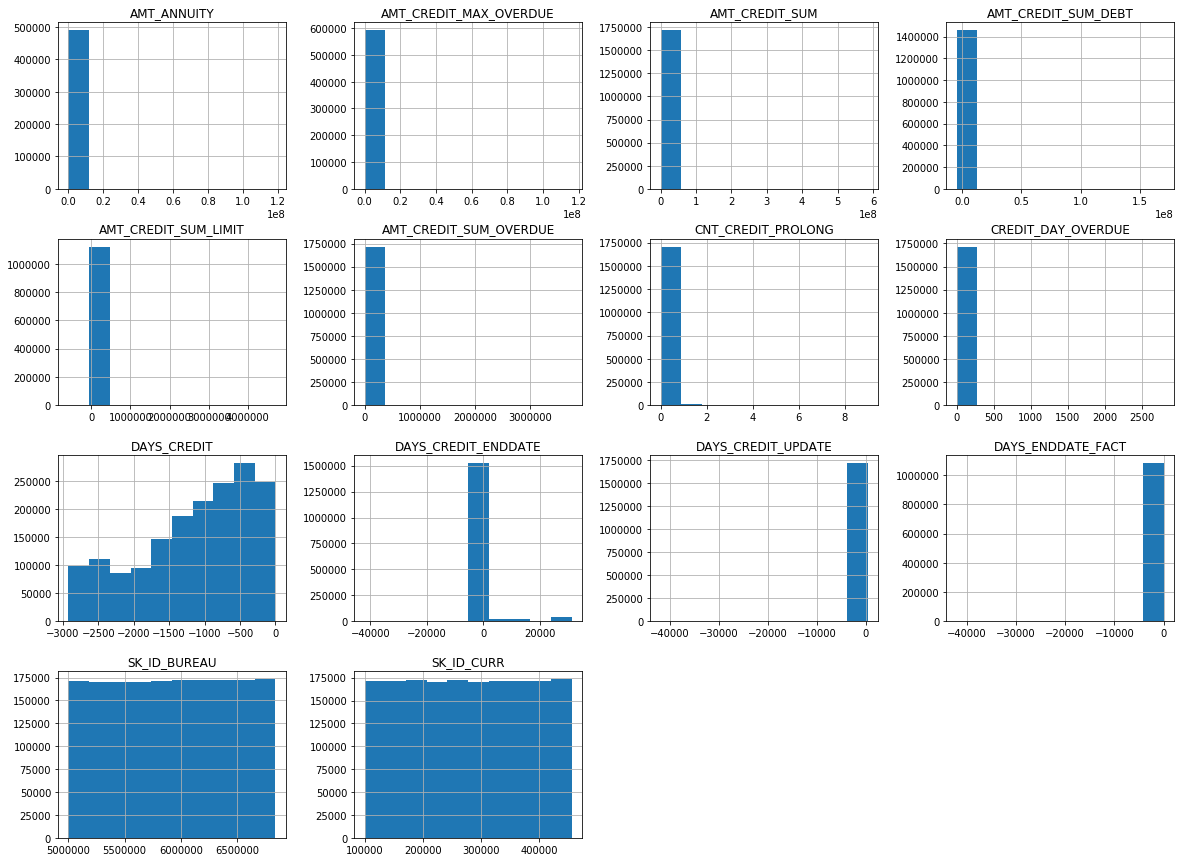

In [8]:
df.hist(figsize=(20,15))   
plt.show()

## Distinct observations 

In [9]:
# Count the number of distinct values in a column
df.nunique()  

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

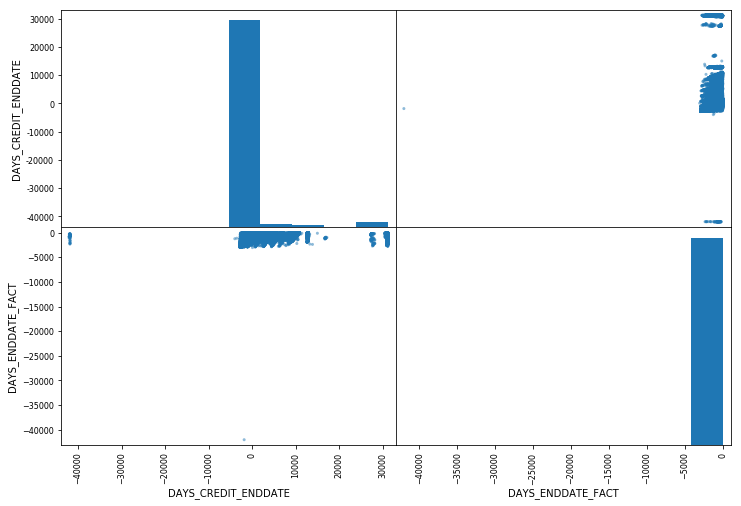

In [12]:
# Scatter Matrix
attributes = ['DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT']
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

## NB: Avoid Data Leakage

Avoid Leaky Validation Strategy and producing models that perform poorly in production. One way to do this is to carefully distinguishing training data from validation data before transformations are performd. Set aside validation set, now, before further analysis and preprocessing are performed.

# Transformations

## Handle Missing Data 

In [16]:
# Count the number of nulls in each colums
df.isnull().sum().sort_values()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_UPDATE              0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
AMT_CREDIT_SUM                 13
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_ANNUITY               1226791
dtype: int64

## Handle missing Data: Drop Columns

Threshold  591940


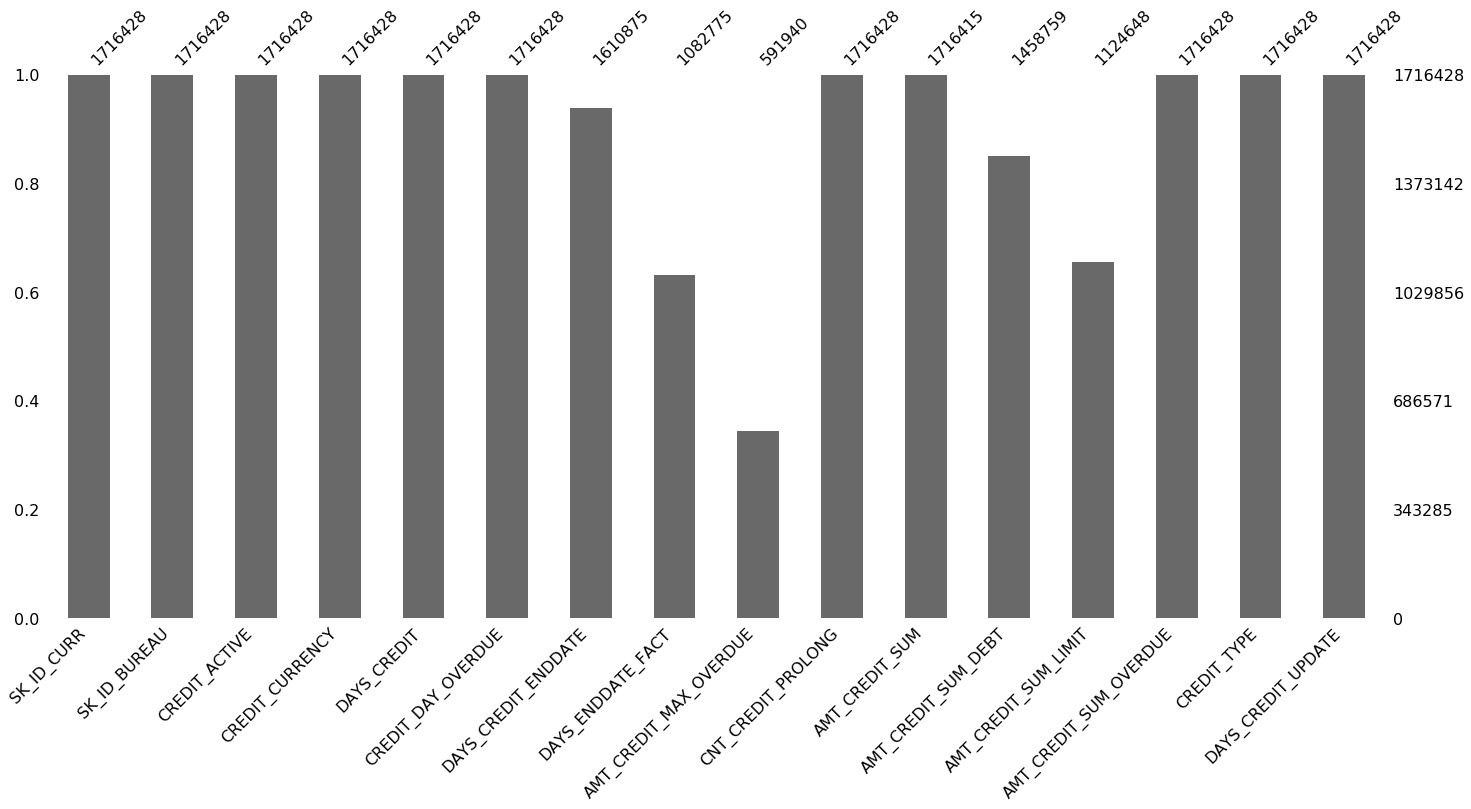

In [18]:
# Drop columns with "too many" nulls
df.dropna(axis='columns', thresh=1716428 - 1124488, inplace=True)
msno.bar(df)

## Handle missing Data: Impute Values

In [30]:
# Replace missing data with a special value. Missing information captured in the model
df.fillna(999,inplace=False).head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,999.0,0,91323.0,0.0,999.0,0.0,Consumer credit,-131,999.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,999.0,999.0,0,225000.0,171342.0,999.0,0.0,Credit card,-20,999.0
2,215354,5714464,Active,currency 1,-203,0,528.0,999.0,999.0,0,464323.5,999.0,999.0,0.0,Consumer credit,-16,999.0
3,215354,5714465,Active,currency 1,-203,0,999.0,999.0,999.0,0,90000.0,999.0,999.0,0.0,Credit card,-16,999.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,999.0,77674.5,0,2700000.0,999.0,999.0,0.0,Consumer credit,-21,999.0


## Remove Outliers

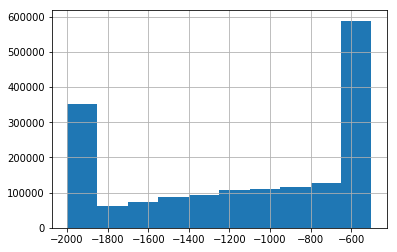

In [38]:
df.DAYS_CREDIT.clip(lower=-2000,upper=-500).hist()